In [1]:
import warnings
warnings.filterwarnings('ignore',category=UserWarning)

In [2]:
#Importing dataset mnist
from keras.datasets import mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
#Determining the datashapes in training and testing sets
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}\nX_test:{X_test.shape}\ny_test:{y_test.shape}")

X_train:(60000, 28, 28)
y_train:(60000,)
X_test:(10000, 28, 28)
y_test:(10000,)


In [4]:
#Since we don't know about the data/image in the dataset we need to add a channel into the dataset 1:gray, 3: colorful(rgb)
X_train = X_train.reshape(60000,28,28,1)
X_test  = X_test.reshape(10000,28,28,1)


In [5]:
#For the target data, we need to reshape the dataset using utils module to_categorical function
import keras


y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

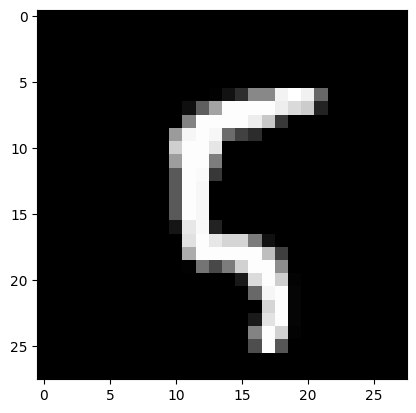

In [6]:
#for displaying digits
import matplotlib.pyplot as plt
plt.imshow(X_train[100],cmap = 'gray')

In [7]:
import numpy as np
arr = y_train[100]
result = np.argmax(arr)
print(result)

5


In [36]:
#Building CNN
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout,Flatten

model = Sequential(
    [
        Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),


        Conv2D(64,(3,3),activation='relu'),


        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.25),

        Flatten(),
        Dense(128,activation='relu'),

        Dropout(0.5),

        Dense(10,activation='softmax')
    ]
)



In [38]:
#Compling the model for execution in memory
model.compile(loss = 'categorical_crossentropy',optimizer = 'sgd',metrics=['accuracy'])

In [40]:
#Training the model
hist = model.fit(X_train,y_train,batch_size=32,epochs=5,validation_data=(X_test,y_test),verbose=2)





Epoch 1/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9410 - loss: 0.1800 - val_accuracy: 0.9826 - val_loss: 0.0563
Epoch 2/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9477 - loss: 0.1625 - val_accuracy: 0.9822 - val_loss: 0.0556
Epoch 3/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9518 - loss: 0.1493 - val_accuracy: 0.9829 - val_loss: 0.0553
Epoch 4/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9547 - loss: 0.1377 - val_accuracy: 0.9849 - val_loss: 0.0514
Epoch 5/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9576 - loss: 0.1306 - val_accuracy: 0.9845 - val_loss: 0.0514


In [41]:
#Evaluating the model performance
val_loss,val_acc = model.evaluate(X_train,y_train)
print(f"Val_Loss:{val_loss}\nVal_ACC:{val_acc}")


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9909 - loss: 0.0275
Val_Loss:0.027277108281850815
Val_ACC:0.9909999966621399


In [42]:
#model prediction
user_input = model.predict(X_train[100].reshape(1,28,28,1))
user_input

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


array([[5.3234072e-07, 3.6795300e-09, 1.5283282e-09, 1.9345185e-04,
        1.0987960e-08, 9.9900097e-01, 1.7311650e-04, 1.9638060e-08,
        1.9216352e-05, 6.1267638e-04]], dtype=float32)

In [43]:
label = np.argmax(user_input)
print(label)

5


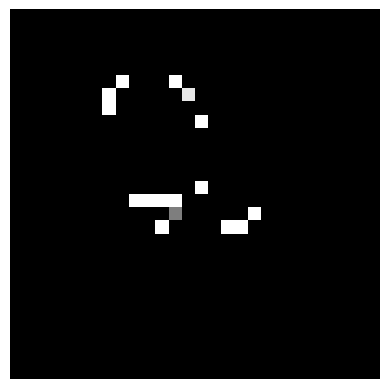

In [45]:
#Testing the model's performance on  new data
from keras.preprocessing import image
img = image.load_img('/two_.png',target_size=(28,28))
plt.imshow(img)
plt.axis('off')
plt.show()

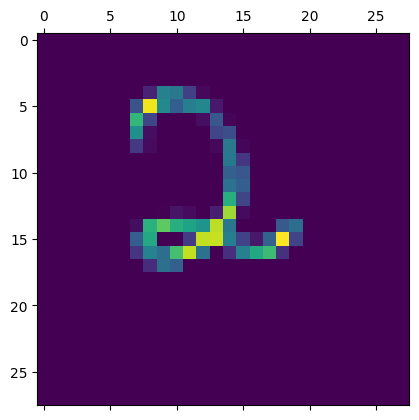

In [46]:
from PIL import Image, ImageOps
gray_img = Image.open('/two_.png').convert('L')

resize_img = gray_img.resize((28, 28))

plt.matshow(resize_img)

In [47]:
input_usr = np.array(resize_img)
input_usr = model.predict([input_usr.reshape(1,28,28,1)])
print(input_usr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
[[0.00832117 0.13791841 0.43373471 0.15584494 0.06024947 0.0158242
  0.00704532 0.12446153 0.03956087 0.01703933]]


In [48]:
result = np.argmax(input_usr)
print(result)

2


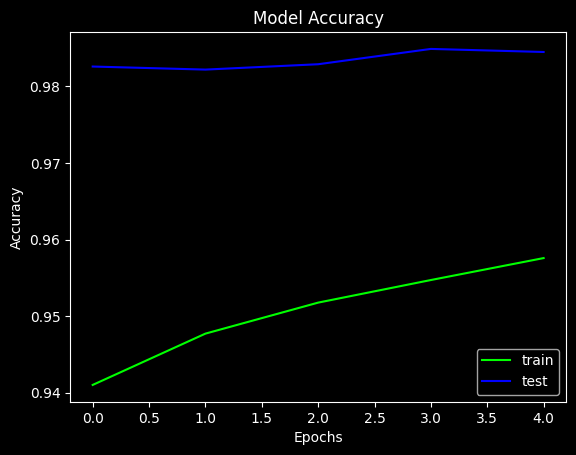

In [50]:
#Visualization of accuracy at each epochs
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'],color='lime')
plt.plot(hist.history['val_accuracy'],color='blue')

plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(["train",'test'],loc='lower right')
plt.style.use('dark_background')
plt.show()

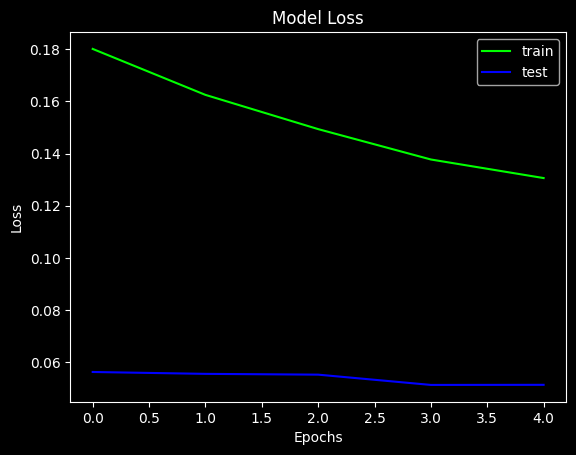

In [51]:
#Visualization of loss function at each epoch
plt.plot(hist.history['loss'],color='lime')
plt.plot(hist.history['val_loss'],color='blue')

plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['train','test'],loc='upper right')
plt.style.use('dark_background')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


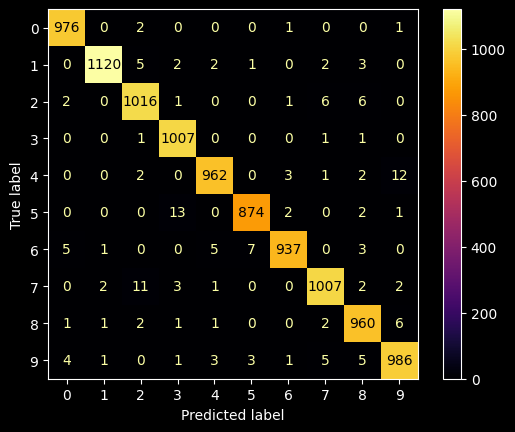

In [55]:
#confusionmatrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob,axis=1)
y_test_decoded = np.argmax(y_test, axis=1) # Decoded y_test
cm = confusion_matrix(y_test_decoded,y_pred) # Using the decoded y_test

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=range(10))
disp.plot(cmap='inferno')
plt.show()